Mariana Valenzuela Lafarga
25 febrero de 2024

# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
data

array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [3]:
def scaler(variable):
    variable= variable - min(variable)
    variable= variable/max(variable)
    return variable

In [4]:
data= scaler(data)
data

array([0.15297868, 0.        , 0.03586734, 0.05767717, 0.13872782,
       0.20073297, 0.22949294, 0.24944437, 0.25722452, 0.27009563,
       0.28664317, 0.30381134, 0.33403528, 0.36583348, 0.39679163,
       0.44389187, 0.50241413, 0.55309481, 0.59828237, 0.64752748,
       0.68677359, 0.74410443, 0.79157612, 0.83057113, 0.88844185,
       0.94200817, 1.        ])

Polinomio grado 1
$$ \hat{y}{x}= \beta_0 + \beta_1 X=0$$

In [5]:
m=len(data)
xn1= data
yn1=5*xn1 +1 +np.random.uniform(0,-.5,m)

In [6]:
ones= np.ones([m,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1,[m,1])
X= np.hstack((ones,x_factor))
X
y_vector= np.reshape(yn1,[m,1])

In [7]:
def funcion_de_costo(beta, X, y):
    beta= np.reshape(beta,[2,1])
    y_pred= X@ beta 
    return ((y_pred- y).T @ (y_pred-y))[0][0]

In [8]:
import scipy.optimize as opt
beta= [1,2]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 0.5101773330323822
 hess_inv: array([[ 0.06236607, -0.09941886],
       [-0.09941886,  0.22541986]])
      jac: array([0.00000000e+00, 2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.74692949, 5.0225669 ])

Polinomio grado 2
$$ \hat{y}{x}= \beta_0 + \beta_1 X + \beta_2 X^2=0$$

In [9]:
xn2= data
yn2=7*xn2**2 + 2*xn2 +1 +np.random.uniform(0,1,m)

In [10]:
ones= np.ones([m,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn2,[m,1])
x2_factor= np.reshape(xn2**2, [m,1])
X= np.hstack((ones,x_factor,x2_factor))
X
y_vector= np.reshape(yn2,[m,1])

In [11]:
def funcion_de_costo(beta, X, y):
    beta= np.reshape(beta,[3,1])
    y_pred= X@ beta 
    return ((y_pred- y).T @ (y_pred-y))[0][0]

In [12]:
beta= [1,2,3]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 2.2409124811455854
 hess_inv: array([[ 0.14338965, -0.60258492,  0.50820829],
       [-0.60258492,  3.34312557, -3.14917397],
       [ 0.50820829, -3.14917397,  3.18095795]])
      jac: array([3.57627869e-07, 5.96046448e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([1.42243562, 2.76579774, 6.26146597])

Polinomio grado 3
$$ \hat{y}{x}= \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3=0$$

In [13]:
xn3= data
yn3=8*xn3**3+ 2*xn3**2 + 2*xn3 +1 +np.random.uniform(0,1,m)

In [14]:
ones= np.ones([m,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn3,[m,1])
x2_factor= np.reshape(xn3**2, [m,1])
x3_factor= np.reshape(xn3**3,[m,1])
X= np.hstack((ones,x_factor,x2_factor,x3_factor))
X
y_vector= np.reshape(yn3,[m,1])

In [15]:
def funcion_de_costo(beta, X, y):
    beta= np.reshape(beta,[4,1])
    y_pred= X@ beta 
    return ((y_pred- y).T @ (y_pred-y))[0][0]

In [16]:
beta= [1,2,3,4]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 1.801509755657427
 hess_inv: array([[  0.20959421,  -1.5036041 ,   2.95776009,  -1.70890191],
       [ -1.5036041 ,  15.04083263, -34.34121096,  21.52831062],
       [  2.95776009, -34.34121096,  85.6843388 , -56.68249052],
       [ -1.70890191,  21.52831062, -56.68249052,  38.84082456]])
      jac: array([3.27825546e-07, 2.53319740e-07, 5.96046448e-08, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 18
     njev: 20
   status: 0
  success: True
        x: array([ 1.5064201 ,  3.45032843, -1.32303038,  9.71495233])

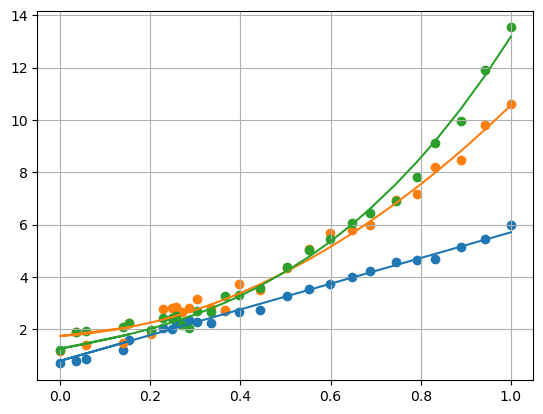

In [17]:
plt.figure()
plt. scatter(xn1,yn1)
plt. scatter(xn2,yn2)
plt. scatter(xn3,yn3)
plt.plot(xn1, 0.79829817 + 4.91426347*xn1)
plt.plot(xn2, 1.74850844 + 0.96953758*xn2+ 7.8514808*xn2**2)
plt.plot(xn3, 1.26392646 + 3.0406009*xn3+ 2.48487525*xn3**2+ 6.40451594* xn3**3)
plt.grid()

---


### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [18]:
import pandas as pd

data= pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [19]:
m1=len(data)
xn1= data["Year"]
yn1= data["Poblacion"]

In [20]:
def funcion_de_costo(beta, X, y):
    r,c= X.shape
    beta= np.reshape(beta,[c,1])
    y_pred= X @ beta
    error= y_pred-y
    return (error.T @ error)[0][0]

In [21]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
X= np.hstack((ones,x_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [22]:
beta= [1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 212137169.54438835
 hess_inv: array([[ 5.37339352e+01, -2.71017285e-02],
       [-2.71017285e-02,  1.36711439e-05]])
      jac: array([   0., -160.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 182
      nit: 12
     njev: 57
   status: 2
  success: False
        x: array([-2.98661024e+06,  1.54397346e+03])

In [23]:
error1= funcion_de_costo(beta,X,y_vector)
error1

402559828417.0

In [24]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
x2_factor= np.reshape(xn1.values**2,[m1,1])
X= np.hstack((ones,x_factor,x2_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [25]:
beta= [1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 212001961.61776266
 hess_inv: array([[ 1.00285312e+00, -8.24327726e-04,  1.63774882e-07],
       [-8.24327726e-04,  2.15857608e-05, -1.06786197e-08],
       [ 1.63774882e-07, -1.06786197e-08,  5.34456805e-12]])
      jac: array([-1.2200000e+02, -2.5277000e+05, -4.9857909e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 5
     njev: 50
   status: 2
  success: False
        x: array([ 1.78221409e+05, -1.64890070e+03,  8.05216698e-01])

In [26]:
error2= funcion_de_costo(beta,X,y_vector)
error2

982666418318044.0

In [27]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn1.values,[m1,1])
x2_factor= np.reshape(xn1.values**2,[m1,1])
x3_factor= np.reshape(xn1.values**3,[m1,1])
X= np.hstack((ones,x_factor,x2_factor,x3_factor))
y_vector= np.reshape(yn1.values,[m1,1])

In [28]:
beta= [1,1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 38799600368.412476
 hess_inv: array([[ 9.16712071e-11, -1.68482633e-10,  2.25933066e-11,
        -1.13558695e-14],
       [-1.68482654e-10,  5.77112902e-09, -4.25436806e-11,
         1.98574812e-14],
       [ 2.25933066e-11, -4.25436754e-11,  5.70467455e-12,
        -2.86728808e-15],
       [-1.13558695e-14,  1.98574791e-14, -2.86728808e-15,
         1.44164347e-18]])
      jac: array([-1.07520000e+04, -3.79054080e+07, -1.05996171e+11, -2.09600717e+14])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 321
      nit: 12
     njev: 62
   status: 2
  success: False
        x: array([ 9.28002466e+07,  4.96750879e+02, -7.19004606e+01,  2.42374044e-02])

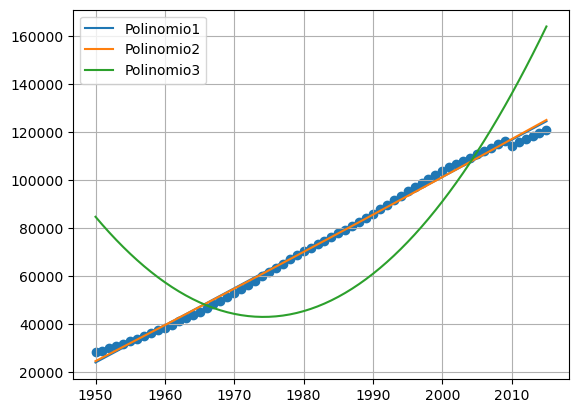

In [29]:
plt.figure()
plt. scatter(xn1,yn1)
plt.plot(xn1, -2986610.24 + 1543.97346*xn1, label="Polinomio1")
plt.plot(xn1, 178221.409 - 1648.9007*xn1 + 0.805216698* xn1**2, label= "Polinomio2")
plt.plot(xn1, 92800246.6 + 496.760879*xn1 - 71.9004606* xn1**2+ 0.0242374044* xn1**3, label= "Polinomio3")
plt.grid()
plt.legend()

In [30]:
error3= funcion_de_costo(beta,X,y_vector)
error3

4.0165575541993195e+21

In [31]:
errores= np.array([error1,error2,error3])
errores= scaler(errores)
errores

array([0.00000000e+00, 2.44553662e-07, 1.00000000e+00])

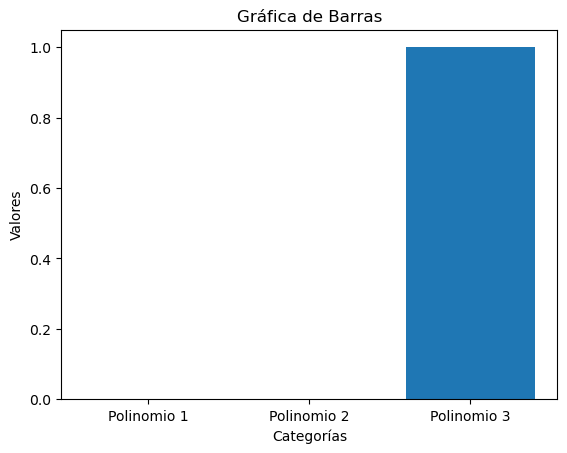

In [32]:
categorias = ['Polinomio 1', 'Polinomio 2', 'Polinomio 3']
valores = [0,0.00000015553068,1]

# Crear la gráfica de barras
plt.bar(categorias, valores)

# Personalizar la gráfica
plt.title('Gráfica de Barras')
plt.xlabel('Categorías')
plt.ylabel('Valores')

# Mostrar la gráfica
plt.show()

Ahora con nacimientos 

In [33]:
xn2= data["Year"]
yn2= data["Nacimientos"]

In [34]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn2.values,[m1,1])
X= np.hstack((ones,x_factor))
y_vector= np.reshape(yn2.values,[m1,1])

In [35]:
beta= [1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 4754604568934.098
 hess_inv: array([[ 7.59762927e-02, -3.82662879e-05],
       [-3.82662879e-05,  2.11130341e-08]])
      jac: array([       0., 37748736.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 228
      nit: 20
     njev: 72
   status: 2
  success: False
        x: array([-3.96359286e+07,  2.11417150e+04])

In [36]:
error1= funcion_de_costo(beta,X,y_vector)
error1

357968513940692.0

In [37]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn2.values,[m1,1])
x2_factor= np.reshape(xn2.values**2,[m1,1])
X= np.hstack((ones,x_factor,x2_factor))
y_vector= np.reshape(yn2.values,[m1,1])

In [38]:
beta= [1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 4852464992890.201
 hess_inv: array([[ 1.22701116e-04, -3.10160696e-05,  1.56050183e-08],
       [-3.10160696e-05,  2.78221205e-05, -1.40190066e-08],
       [ 1.56050183e-08, -1.40190066e-08,  7.06439217e-12]])
      jac: array([0.00000000e+00, 1.31072000e+05, 2.58736128e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 152
      nit: 6
     njev: 35
   status: 2
  success: False
        x: array([-9.09046845e+03, -1.95583050e+04,  1.04462304e+01])

In [39]:
error2= funcion_de_costo(beta,X,y_vector)
error2

193387602021339.0

In [40]:
ones= np.ones([m1,1])
#Acomoda el xn en un vector de m renglones y 1 columna
x_factor= np.reshape(xn2.values,[m1,1])
x2_factor= np.reshape(xn2.values**2,[m1,1])
x3_factor= np.reshape(xn2.values**3,[m1,1])
X= np.hstack((ones,x_factor,x2_factor,x3_factor))
y_vector= np.reshape(yn2.values,[m1,1])

In [41]:
beta= [1,1,1,1]
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

      fun: 10681562827413.422
 hess_inv: array([[ 2.17691817e-05, -1.16246140e-09, -2.86146197e-09,
         1.44918984e-12],
       [-1.16246237e-09,  9.08289179e-13,  2.23120012e-12,
        -1.12490868e-15],
       [-2.86146435e-09,  2.23120012e-12,  5.49219191e-12,
        -2.76900869e-15],
       [ 1.44919103e-12, -1.12490868e-15, -2.76900869e-15,
         1.39618126e-18]])
      jac: array([0.00000000e+00, 2.93601280e+07, 1.13469030e+09, 2.30499418e+12])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 417
      nit: 11
     njev: 81
   status: 2
  success: False
        x: array([ 7.61786408e+05,  8.08972125e+05, -8.25752302e+02,  2.10865988e-01])

In [42]:
error3= funcion_de_costo(beta,X,y_vector)
error3

4.0142789221705486e+21

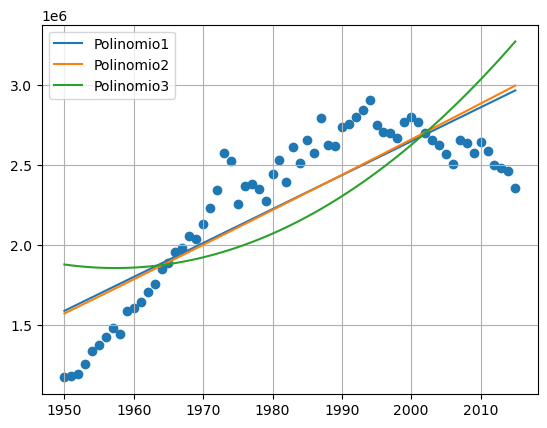

In [43]:
plt.figure()
plt. scatter(xn2,yn2)
plt.plot(xn2, -39635928.6 + 21141.7150*xn2, label="Polinomio1")
plt.plot(xn2, -9090.46845 -19558.3050*xn2 +  10.4462304* xn2**2, label= "Polinomio2")
plt.plot(xn2, 761786.408 + 808972.125*xn2 -825.752302* xn2**2+ .210865988* xn2**3, label= "Polinomio3")
plt.grid()
plt.legend()

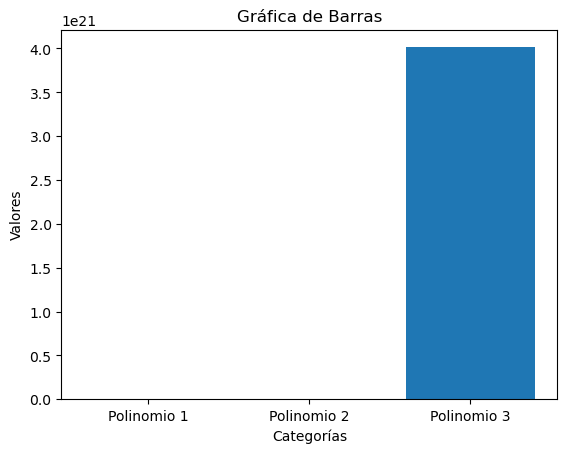

In [44]:
categorias = ['Polinomio 1', 'Polinomio 2', 'Polinomio 3']
valores = [error1,error2,error3]

# Crear la gráfica de barras
plt.bar(categorias, valores)

# Personalizar la gráfica
plt.title('Gráfica de Barras')
plt.xlabel('Categorías')
plt.ylabel('Valores')

# Mostrar la gráfica
plt.show()